## Get Started

windows

conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/peterjc123/

### for CPU only packages

conda install pytorch-cpu

### for Windows 10 and Windows Server 2016, CUDA 8

conda install pytorch

### for Windows 10 and Windows Server 2016, CUDA 9

conda install pytorch cuda90

In [3]:
import torch

In [4]:
torch.abs(torch.FloatTensor([-1, -2, 3]))


 1
 2
 3
[torch.FloatTensor of size 3]

In [5]:
a = torch.Tensor(3, 4)

In [6]:
%hist

import torch
import torch as t
import torch
torch.abs(torch.FloatTensor([-1, -2, 3]))
a = torch.Tensor(3, 4)
%hist


In [7]:
%timeit a.sum()

495 ns ± 36.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
%cat chapter1.ipynb

ERROR:root:Line magic function `%cat` not found.


In [9]:
a = torch.Tensor(5,5)

In [10]:
a.size()

torch.Size([5, 5])

In [11]:
%xdel a

In [12]:
a

NameError: name 'a' is not defined

## Sample fro add

In [13]:
x = torch.Tensor(5, 3)

In [14]:
x


1.00000e-39 *
  0.0000  0.0000  0.0007
  0.0000  0.0000  0.0000
 -6.8510  0.0007  0.0000
  0.0000  0.1837  0.0000
 -9.2456  0.0007  0.0000
[torch.FloatTensor of size 5x3]

此时x并没有被初始化

In [15]:
x.size()

torch.Size([5, 3])

In [16]:
torch.Size([5,3])

torch.Size([5, 3])

In [17]:
y = torch.rand(5, 3)

In [18]:
x+y


 0.4501  0.6142  0.0321
 0.6432  0.1649  0.8004
 0.8577  0.2090  0.4638
 0.0254  0.5603  0.1114
 0.4641  0.5089  0.3590
[torch.FloatTensor of size 5x3]

In [19]:
torch.add(x, y)


 0.4501  0.6142  0.0321
 0.6432  0.1649  0.8004
 0.8577  0.2090  0.4638
 0.0254  0.5603  0.1114
 0.4641  0.5089  0.3590
[torch.FloatTensor of size 5x3]

In [20]:
result = x+y

In [21]:
result


 0.4501  0.6142  0.0321
 0.6432  0.1649  0.8004
 0.8577  0.2090  0.4638
 0.0254  0.5603  0.1114
 0.4641  0.5089  0.3590
[torch.FloatTensor of size 5x3]

In [22]:
# another way to add
result_2 = torch.Tensor(5, 5)
torch.add(x, y, out=result_2)


 0.4501  0.6142  0.0321
 0.6432  0.1649  0.8004
 0.8577  0.2090  0.4638
 0.0254  0.5603  0.1114
 0.4641  0.5089  0.3590
[torch.FloatTensor of size 5x3]

In [23]:
a = torch.ones(5,2)

In [24]:
a


 1  1
 1  1
 1  1
 1  1
 1  1
[torch.FloatTensor of size 5x2]

## Autograd

如今广泛使用的深度学习算法本质上是通过反向传播求导数，在tensor上的操作，Autograd能够提供自动微分，避免手动计算导数的复杂过程。

In [25]:
from torch.autograd import Variable

In [27]:
x = Variable(torch.ones(2, 2), requires_grad = True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [29]:
y = x.sum()
y

Variable containing:
 4
[torch.FloatTensor of size 1]

In [30]:
y.grad_fn

In [31]:
y.backward() # BP, compute gradiant

In [32]:
y.grad

In [33]:
x.grad

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

grad在反向传播过程中是累加的（accumulated），每次进行反向传播，梯度都会随之累加，因此反向传播之前需要将梯度清零。

In [34]:
y.backward()
x.grad

Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

In [35]:
x.grad.data.zero_()


 0  0
 0  0
[torch.FloatTensor of size 2x2]

In [36]:
y.backward()
x.grad

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable和Tensor具有近乎一致的接口

In [38]:
x = Variable(torch.ones(4,5))
x

Variable containing:
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
[torch.FloatTensor of size 4x5]

In [39]:
y = torch.cos(x)
y

Variable containing:
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
[torch.FloatTensor of size 4x5]

## 神经网络

torch.nn专门为神经网络设计的模块化接口

nn.Module是nn中最重要的类别 ，看作是一个网络的封装

In [56]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # init as default
        super(Net, self).__init__()
        # equal ti nn.Module.__init__(self)
        # conv net layer1
        self.conv1 = nn.Conv2d(1, 6, 5)
        # inchannel, outchannel, kernel_size
        # 5 for 5 * 5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # FC, fullly connected layer
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # conv -> activate -> pooling
        # (2, 2) for pool
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape '-1' for auto
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)    

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [57]:
net.named_parameters

<bound method Module.named_parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [58]:
params = list(net.parameters())

In [59]:
print(len(params))

10


In [60]:
for name, parameter in net.named_parameters():
    print(name, ':', parameter.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [61]:
input = Variable(torch.randn(1,1,32, 32))

In [62]:
out = net(input)

In [63]:
out.size()

torch.Size([1, 10])

In [64]:
net.zero_grad()

In [67]:
out.backward(Variable(torch.ones(1, 10)))

In [68]:
output = net(input)
target = Variable(torch.arange(0, 10))

In [69]:
output

Variable containing:
 0.0754  0.1256 -0.0713  0.0397  0.1001  0.0483 -0.1136 -0.1357 -0.0142  0.0064
[torch.FloatTensor of size 1x10]

In [70]:
target

Variable containing:
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
[torch.FloatTensor of size 10]

In [71]:
criterion = nn.MSELoss()
loss = criterion(output, target)

In [72]:
loss

Variable containing:
 28.6959
[torch.FloatTensor of size 1]

In [76]:
net.zero_grad() # 将net中所有可以学习参数的梯度清零
print('conv1.biias grad before learn')
print(net.conv1.bias.grad)
loss.backward() # BP
print('conv1.biias grad after learn')
print(net.conv1.bias.grad)

conv1.biias grad before learn
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.biias grad after learn
Variable containing:
1.00000e-02 *
  6.2606
 -2.1543
 -2.0367
  5.4475
 -3.7546
  7.8273
[torch.FloatTensor of size 6]



## CIFAR 10
the project

In [78]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

import torch

show = ToPILImage() # change Tensor to Image

# define the data precession part for the project
transform = transforms.Compose([
    transforms.ToTensor(), # transform to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # normalization mean and std
])

# for training dataset
trainset = tv.datasets.CIFAR10(
    root='C:/Users/pangbochen/Documents/data',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# for testing dataset
testset = tv.datasets.CIFAR10(
    root='C:/Users/pangbochen/Documents/data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

classes = ('plane', 'car', 'brid', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# fetch a single data as the example
(data, label) = trainset[100]

# (data+1)/2

Files already downloaded and verified
Files already downloaded and verified


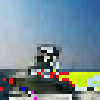

In [82]:
show(data).resize((100, 100))

In [83]:
classes[label]

'ship'

In [85]:
# Data loader is iterable
dataiter = iter(trainloader)
images, labels = dataiter.next()

# import the net


class Net(nn.Module):
    def __init__(self):
        # init as default
        super(Net, self).__init__()
        # equal ti nn.Module.__init__(self)
        # conv net layer1
        self.conv1 = nn.Conv2d(3, 6, 5)
        # inchannel, outchannel, kernel_size
        # 5 for 5 * 5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # FC, fullly connected layer
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # conv -> activate -> pooling
        # (2, 2) for pool
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape '-1' for auto
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

# define loss and the optimizer
from torch import optim
import torch.nn as nn
from torch.autograd import Variable

criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# for trainig part
# follwing three parts
# input data
# forward and backpropagation
# update parameters
for epoch in range(2):
    running_loss =0.0
    # enumerate, start from 0
    for i, data in enumerate(trainloader, 0):

        # input data
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        # zero grads
        optimizer.zero_grad()

        # forward and backward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # log information
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('{}, {} loss: {}'.format(epoch+1, i+1, running_loss/2000))
            # zero running_loss
            running_loss = 0.0
    print('Finished Training')

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
1, 2000 loss: 2.175424603998661
1, 4000 loss: 1.8599561133086682
1, 6000 loss: 1.6964581547677517
1, 8000 loss: 1.5916093833446503
1, 10000 loss: 1.5405903279483317
1, 12000 loss: 1.4608945713639259
Finished Training
2, 2000 loss: 1.4225603680536152
2, 4000 loss: 1.360566551603377
2, 6000 loss: 1.3568233187273144
2, 8000 loss: 1.3164633383378386
2, 10000 loss: 1.292623398963362
2, 12000 loss: 1.2975202806964516
Finished Training


上面的训练过程使用了2个epoch，一个epoch指对数据集进行一次遍历。

接着对模型进行测试

actual label：      cat     ship     ship    plane


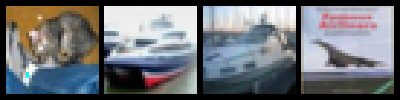

In [86]:
# then test the model
dataiter = iter(testloader)
images, labels = dataiter.next()
print('actual label：',  ' '.join('%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images/2-0.5)).resize((400, 100))

In [87]:
# calculate the score on each class
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)
print('predict results', ' '.join('%08s'%classes[predicted[j]] for j in range(4)))

predict results      cat     ship    plane     ship


In [90]:

# predict on all dataset
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    
    correct += (predicted == labels).sum()

print('1000 total accuracy is %d'%(correct/total))

1000 total accuracy is 0


In [91]:
len(testloader)

2500